# Meerkat + MIMIC

MIMIC (Medical Information Mart for Intensive Care) is a large database of deidentified EHR and medical imaging data. For more information, see the [MIMIC documentation](https://mimic.mit.edu/docs/about/). This Meerkat integration enables quick exploration the MIMIC database via the `DataPanel`. 



In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from meerkat.contrib.mimic import build_mimic_dp
import os
import meerkat as mk

In [3]:
dataset_dir = "/Users/sabrieyuboglu/data/datasets/mimic"
dp = build_mimic_dp(
    dataset_dir="/Users/sabrieyuboglu/data/datasets/mimic",
    gcp_project="hai-gcp-fine-grained",
    split=True,
    reports=True
)

Querying MIMIC database with gcp_project='hai-gcp-fine-grained' for tables={'patients', 'cxr_studies', 'admit', 'labels', 'cxr_records', 'dicom_meta'}.


Downloading: 100%|██████████| 523740/523740 [00:09<00:00, 53892.72rows/s]


Preparing DataPanel...


In [ ]:
# write the DataPanel to disk
# the size of the file is only 243 MB
dp.write(os.path.join(dataset_dir, "mimic.mk"))

In [ ]:
# read the DataPanel from disk
dp = mk.DataPanel.read(os.path.join(dataset_dir, "mimic.mk"))

In [5]:
# load a single row
# this takes some time because we're pulling the images from GCS
row = dp[0]

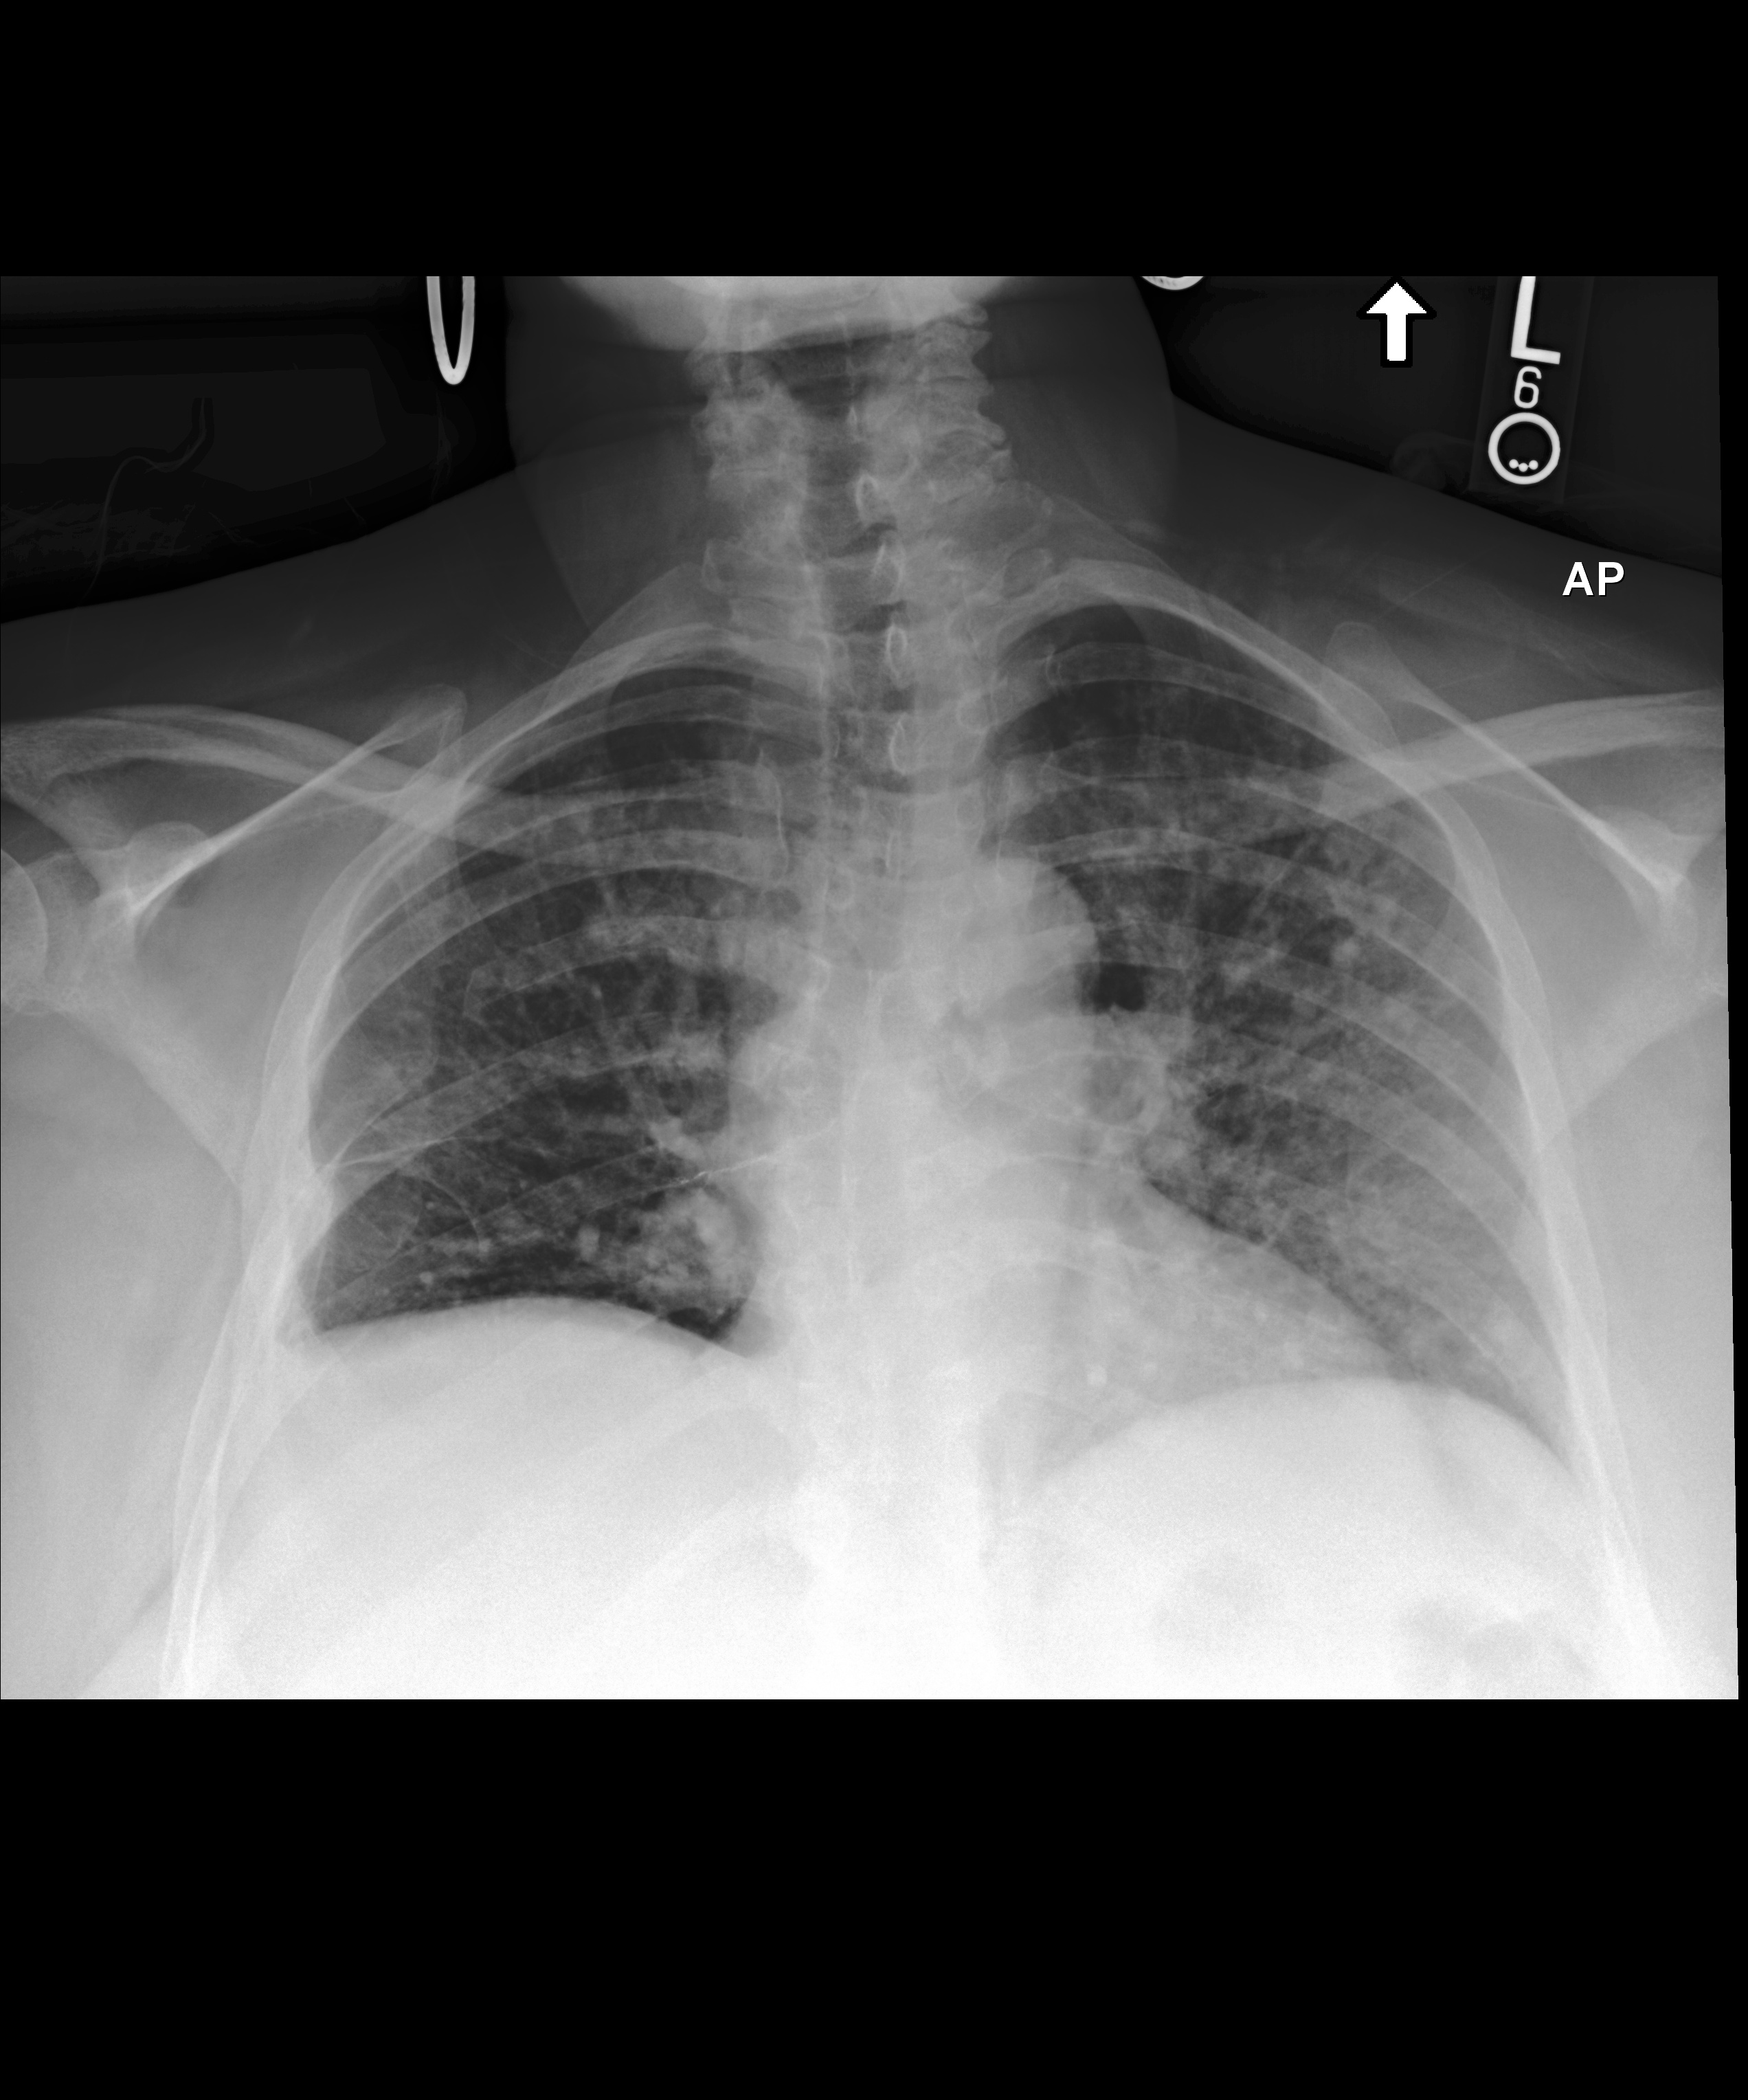

In [8]:
row["cxr_jpg"]

In [9]:
row["report"]

'                                 FINAL REPORT\n CHEST RADIOGRAPHS\n \n HISTORY:  Metastatic disease with known pulmonary metastases, presenting with\n fever and leukocytosis.\n \n COMPARISONS:  Radiographs from ___ as well as CT of the abdomen\n and pelvis from that same day.  Radiographs are also available from ___.\n \n FINDINGS:  The lung volumes are low.  The cardiac, mediastinal and hilar\n contours appear unchanged, allowing for differences in technique.  There are a\n number of round nodular densities projecting over each upper lung, but more\n numerous and discretely visualized in the left upper lobe, similar to prior\n study.  However, in addition, there is a more hazy widespread opacity\n projecting over the left mid upper lung which could be compatible with a\n coinciding pneumonia.  Pulmonary nodules in the left upper lobe are also not\n completely characterized on this study.  There is no pleural effusion or\n pneumothorax.  Post-operative changes are similar along the ri

In [11]:
row["cxr_dicom"]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.206286279903022324369362527677447690448
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.25.55362949469033348352269585565668676650
(0002, 0013) Implementation Version Name         SH: 'MIMIC-CXR v2.0.0'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID                    UI: 2.25.20628627990302232436936252767744